# Digital Twin Simulation: LDHA Inhibition in Cancer Metabolism

This notebook simulates a **digital twin** of a cancer cell's metabolism focusing on LDHA inhibition.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap

df = pd.read_csv('simulated_cancer_metabolism.csv')
df.head()

,glucose,lactate,atp,condition,survival_index,binary_survival
0,10.993428,11.635081,21.282417,baseline,0.195439,0
1,9.723471,9.998756,14.727400,baseline,0.159478,0
2,11.295377,10.645200,21.607021,baseline,0.194243,0
3,13.046060,15.584903,20.409712,baseline,0.225495,0
4,9.531693,9.934979,15.894665,baseline,0.161226,0


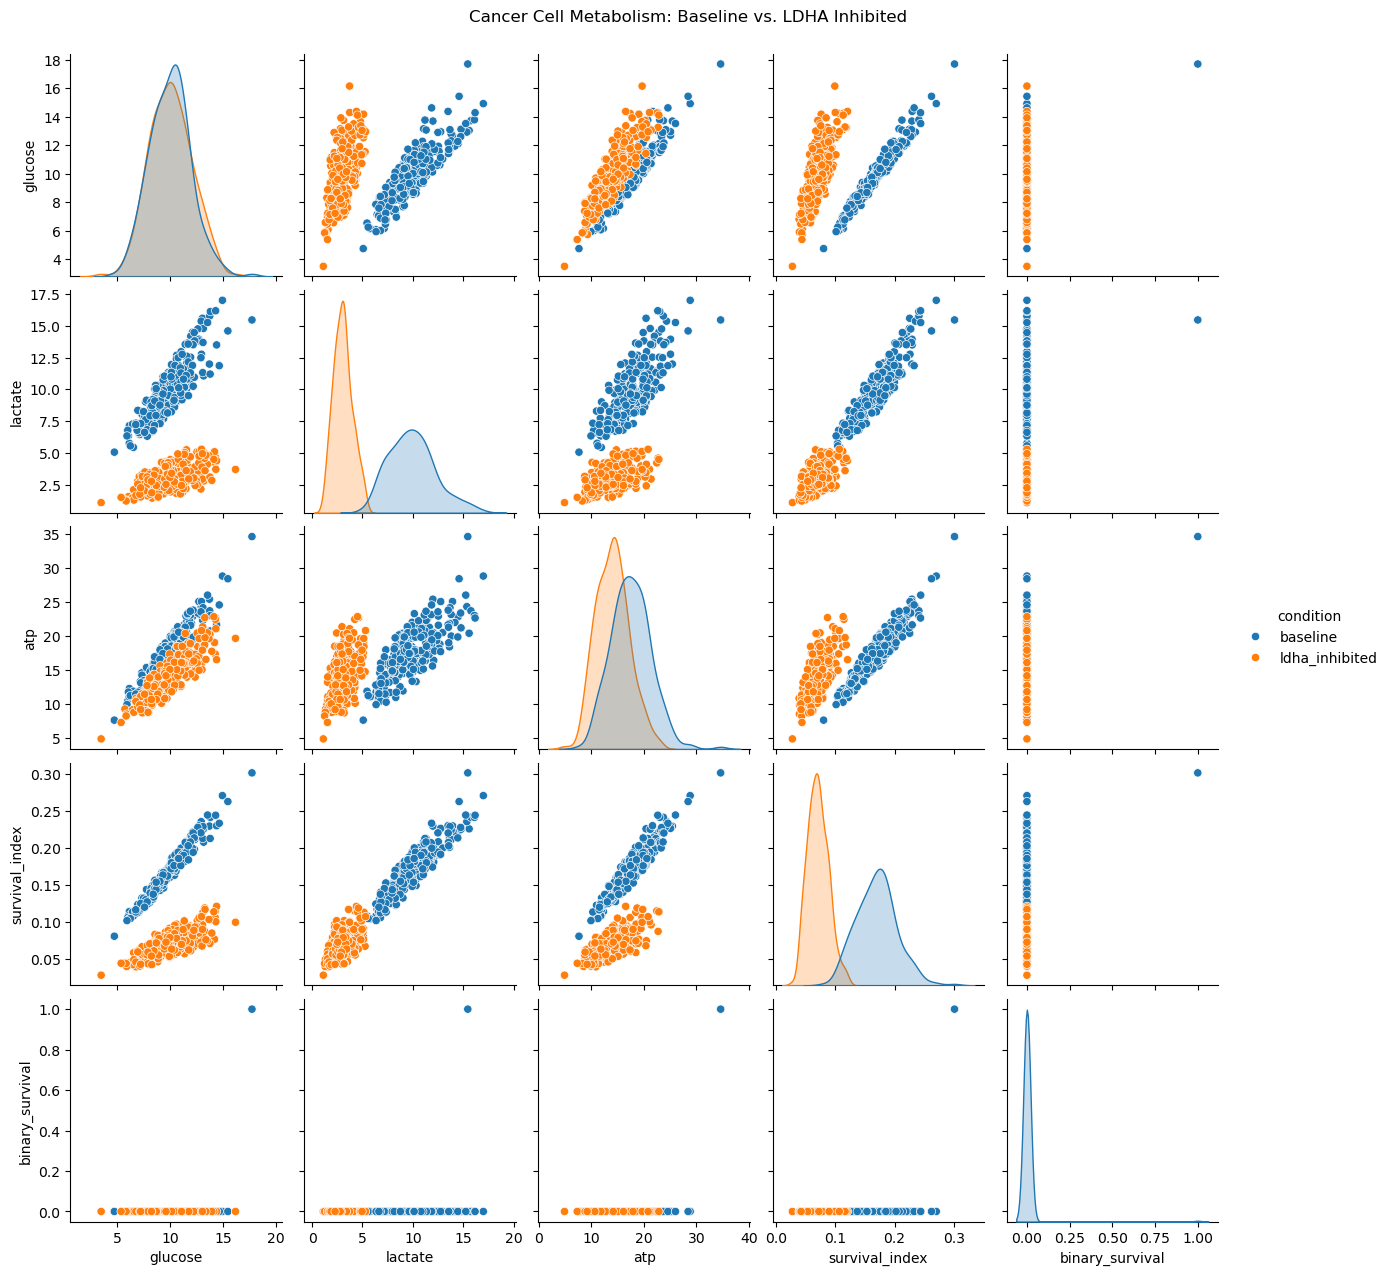

In [4]:
# Visualize metabolism
sns.pairplot(df, hue='condition')
plt.suptitle('Cancer Cell Metabolism: Baseline vs. LDHA Inhibited', y=1.02)
plt.show()

In [6]:
# Train ML model
features = ['glucose', 'lactate', 'atp']
X = df[features]
y = df['binary_survival']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
preds = clf.predict(X)

print(confusion_matrix(y, preds))
print(classification_report(y, preds))

[[499   0]
 [  0   1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00         1

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



<Figure size 640x480 with 0 Axes>

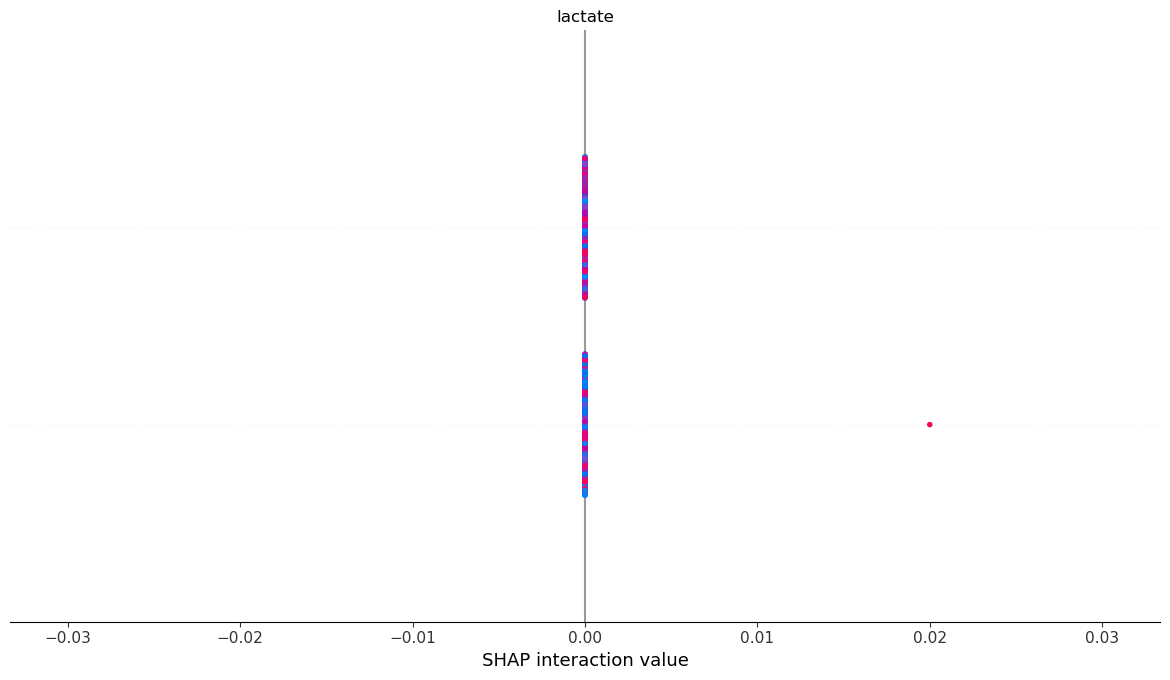

In [8]:
# SHAP feature importance
explainer = shap.Explainer(clf, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)